## Handling Imbalanced Dataset

1. Up Sampling
2. Down Sampling

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set the random seed for reproducibility
np.random.seed(123)  # is seed randomly value change nhi hoga fixed ho jaayega.

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [4]:
n_class_0  # 900 data points

900

In [5]:
n_class_1   #100 data points, so imbalanced datasets

100

In [6]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET having normal distribution
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

# numpy.random.normal
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

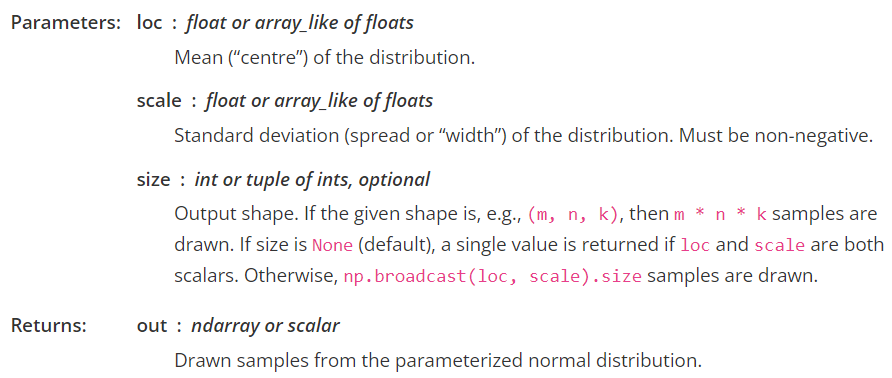

In [6]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [7]:
class_1

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [7]:
df= pd.concat([class_0,class_1]).reset_index(drop=True)   # dono dataset concat ho jaayega.

In [8]:
df

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [13]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

# Upsampling

In [14]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [15]:
df_minority.head()

,feature_1,feature_2,target
900,-0.643425,2.571923,1
901,1.551009,1.782767,1
902,1.641093,2.054318,1
903,2.133194,2.155998,1
904,1.355758,2.467810,1


In [16]:
df_majority.head()

,feature_1,feature_2,target
0,-1.774224,0.285744,0
1,-1.201377,0.333279,0
2,1.096257,0.531807,0
3,0.861037,-0.354766,0
4,-1.520367,-1.120815,0


In [17]:
# Upsampling perform
from sklearn.utils import resample

In [18]:
df_minority_upsample=resample(df_minority,
                               replace=True,   ## Sample with replacement
                               n_samples=len(df_majority),  # to match the majority class
                               random_state=42    # koi value
                               )

In [19]:
df_minority_upsample.shape

(900, 3)

In [20]:
df_minority_upsample['target'].value_counts()

target
1    900
Name: count, dtype: int64

In [22]:
df_upsampled= pd.concat([df_majority, df_minority_upsample])

In [23]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [24]:
df_upsampled.shape

(1800, 3)

## Downsampling

In [42]:
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

df = pd.concat([class_0, class_1]).reset_index(drop=True)

# Check the class distribution
print(df['target'].value_counts())

target
0    900
1    100
Name: count, dtype: int64


In [43]:
## downsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [44]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False, ## Sample without replacement
         n_samples=len(df_minority),        # to match the minority class
         random_state=42
        )

In [45]:
df_majority_downsampled.shape

(100, 3)

In [46]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])

In [47]:
df_downsampled['target'].value_counts()

target
1    100
0    100
Name: count, dtype: int64